In [ ]:
import tensorflow as tf
import numpy as np
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.utils import to_categorical
(tr_x,tr_y),(tt_x,tt_y)=imdb.load_data(num_words=500) # 정수인코딩이 끝난 상태(문장이 숫자로 되어있음)
for i in range(len(tr_x)):
  tr_x[i]=[w for w in tr_x[i] if w > 2]
for i in range(len(tt_x)):
  tt_x[i]=[w for w in tt_x[i] if w > 2]
np.random.seed(42)
r_idx=np.random.permutation(25000)
s_tr_x=tr_x[r_idx[:20000]]
s_tr_y=tr_y[r_idx[:20000]]
s_tt_x=tr_x[r_idx[20000:]]
s_tt_y=tr_y[r_idx[20000:]]

p_tr_x=pad_sequences(s_tr_x,maxlen=100)
p_tt_x=pad_sequences(s_tt_x,maxlen=100)
s_tr_x=to_categorical(p_tr_x)
s_tt_x=to_categorical(p_tt_x)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Embedding, Flatten
from keras.layers import TimeDistributed
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD
from keras.layers.rnn import TimeDistributed
import numpy as np

In [ ]:
es = EarlyStopping(patience = 5)
ck = ModelCheckpoint("b_rnn_m.h5",save_best_only=True)
rmsprop = RMSprop(learning_rate = 0.0001)

In [ ]:
m = Sequential()
m.add(SimpleRNN(8, input_shape = s_tr_x.shape[1:]))
m.add(Dense(1, activation = 'sigmoid'))
#m.summary()
m.compile(optimizer = rmsprop, loss='binary_crossentropy',metrics='acc')
hy = m.fit(s_tr_x, s_tr_y ,validation_data=(s_tt_x,s_tt_y), batch_size = 64, epochs = 100, callbacks=[es, ck])

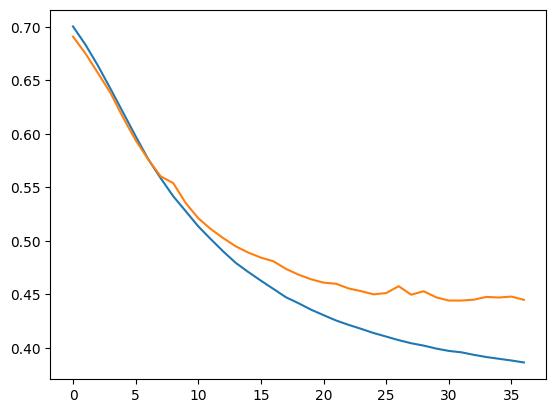

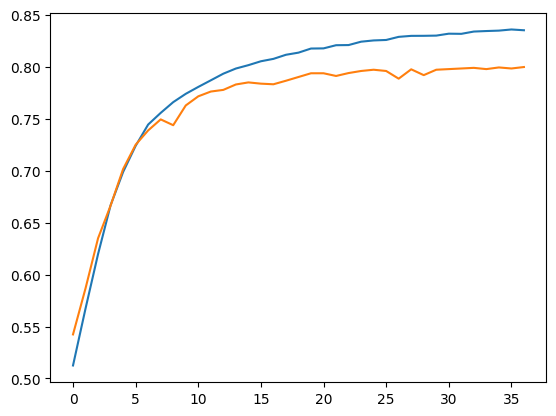

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])
plt.show()

In [ ]:
es = EarlyStopping(patience = 3)
ck = ModelCheckpoint("b_rnn_m1.h5",save_best_only=True)
rmsprop = RMSprop(learning_rate = 0.0001)

In [ ]:
# 차원 줄이기
m1 = Sequential()
m1.add(Embedding(500, 16, input_length = 100)) # 100차원을 16차원으로 줄임
m1.add(SimpleRNN(8, return_sequences = True, dropout = 0.5))
m1.add(SimpleRNN(8, dropout = 0.5))
#m1.add(Flatten())
m1.add(Dense(1, activation = 'sigmoid'))
m1.compile(optimizer = rmsprop, loss='binary_crossentropy',metrics='acc')
hy1 = m1.fit(p_tr_x, s_tr_y ,validation_data=(p_tt_x,s_tt_y), batch_size = 64, epochs = 50, callbacks=[es, ck])

Epoch 1/50
313/313 [==============================] - 23s 67ms/step - loss: 0.6917 - acc: 0.5634 - val_loss: 0.6332 - val_acc: 0.6558
Epoch 2/50
313/313 [==============================] - 19s 62ms/step - loss: 0.6404 - acc: 0.6478 - val_loss: 0.5864 - val_acc: 0.7134
Epoch 3/50
313/313 [==============================] - 21s 67ms/step - loss: 0.6020 - acc: 0.6942 - val_loss: 0.5588 - val_acc: 0.7342
Epoch 4/50
313/313 [==============================] - 21s 68ms/step - loss: 0.5693 - acc: 0.7259 - val_loss: 0.5281 - val_acc: 0.7620
Epoch 5/50
313/313 [==============================] - 21s 66ms/step - loss: 0.5518 - acc: 0.7390 - val_loss: 0.5135 - val_acc: 0.7708
Epoch 6/50
313/313 [==============================] - 21s 68ms/step - loss: 0.5341 - acc: 0.7540 - val_loss: 0.4956 - val_acc: 0.7824
Epoch 7/50
313/313 [==============================] - 19s 60ms/step - loss: 0.5229 - acc: 0.7596 - val_loss: 0.4873 - val_acc: 0.7850
Epoch 8/50
313/313 [==============================] - 21s 66ms

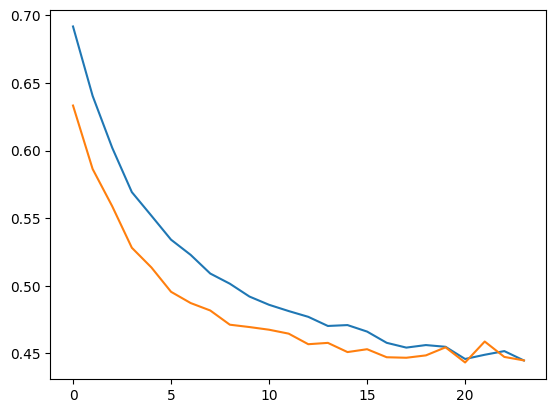

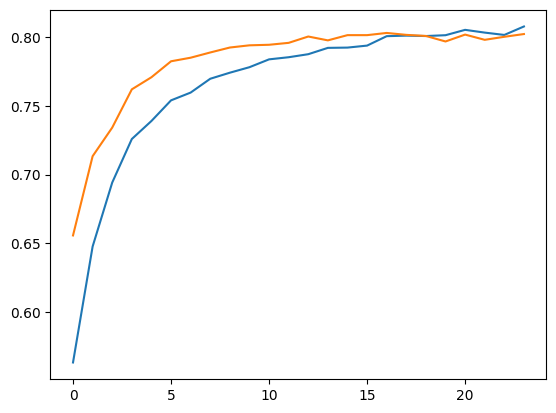

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])
plt.show()
plt.plot(hy1.history['acc'])
plt.plot(hy1.history['val_acc'])
plt.show()

In [ ]:
from keras.layers import LSTM, GRU

In [ ]:
m2 = Sequential()
m2.add(Embedding(500, 16, input_length = 100)) # 100차원을 16차원으로 줄임
m2.add(GRU(8, return_sequences = True, dropout = 0.5))
m2.add(GRU(8, dropout = 0.5))
m2.add(Dense(1, activation = 'sigmoid'))
m2.compile(optimizer = rmsprop, loss='binary_crossentropy',metrics='acc')
hy2 = m2.fit(p_tr_x, s_tr_y ,validation_data=(p_tt_x,s_tt_y), batch_size = 64, epochs = 50, callbacks=[es, ck])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])
plt.show()
plt.plot(hy2.history['acc'])
plt.plot(hy2.history['val_acc'])
plt.show()

In [ ]:
from keras.models import load_model
lm = load_model('b_rnn_m.h5')
lm1 = load_model('b_rnn_m1.h5')

#DNN

In [ ]:
# in(x) => act(XW + B) => out, 전체, 피처별 독립, 순서 변경 가능

#CNN

In [ ]:
# in(x) => act(XW + B) => out, 부분, 피처별 독립, 순서 변경 가능

RNN

In [ ]:
# in(x) => act(hWh + XWx + B) => out, 전체, 피처별 연속, 순서 변경 불가능

머신러닝 -> 모델 -> 예측기<br>
딥러닝 -> 모델 -> 예측기

한글 분류기

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 33.5 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import pad_sequences
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df = pd.read_table('ratings_test.txt')[['document','label']]

In [ ]:
df = df.dropna()
df = df.drop_duplicates(subset = ['document'])
df.document = df.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '') # 한글 제외 단어 삭제
df.document = df.document.str.replace('^ +', '')
df.document = df.document.replace('', np.nan)
df = df.dropna()
okt = Okt()
s_w = set(['은', '는', '이', '가', '를', '들', '에게', '의', '도', '을', '으로', '만','라서', '하다'])
X_data = []
for i in tqdm(df['document']):
    tk_d = okt.morphs(i)
    end_d = [w for w in tk_d if w not in s_w]
    X_data.append(' '.join(end_d))

<ipython-input-16-05e05d352b47>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.document = df.document.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '') # 한글 제외 단어 삭제
<ipython-input-16-05e05d352b47>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.document = df.document.str.replace('^ +', '')
100%|██████████| 48852/48852 [42:55<00:00, 18.96it/s]


In [ ]:
y_data = df.label.values

In [ ]:
len(X_data), len(y_data)

(48852, 48852)

In [ ]:
X, test_x, Y, test_y = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42, stratify = y_data)
train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [ ]:
tk = Tokenizer()
tk.fit_on_texts(train_x)

In [ ]:
n =len([d for d in sorted(list(tk.word_counts.items()), key = lambda x:x[1]) if d[1] >4])

In [ ]:
tk = Tokenizer(n)
tk.fit_on_texts(train_x)

In [ ]:
tk_train_x = tk.texts_to_sequences(train_x)
tk_test_x = tk.texts_to_sequences(test_x)
tk_val_x = tk.texts_to_sequences(val_x)

In [ ]:
l_w = np.array([len(w) for w in tk_train_x])

In [ ]:
np.max(l_w), np.min(l_w)

(59, 0)

(array([1.213e+03, 1.691e+03, 2.121e+03, 2.645e+03, 2.502e+03, 2.324e+03,
        2.047e+03, 1.778e+03, 1.568e+03, 1.403e+03, 1.116e+03, 1.003e+03,
        7.660e+02, 5.580e+02, 4.970e+02, 3.630e+02, 3.280e+02, 2.810e+02,
        5.080e+02, 2.370e+02, 2.080e+02, 1.760e+02, 1.630e+02, 1.550e+02,
        1.430e+02, 1.640e+02, 1.560e+02, 1.390e+02, 1.350e+02, 1.280e+02,
        1.210e+02, 1.140e+02, 1.100e+02, 8.700e+01, 7.400e+01, 8.100e+01,
        6.700e+01, 7.800e+01, 3.200e+01, 1.900e+01, 1.200e+01, 6.000e+00,
        8.000e+00, 8.000e+00, 5.000e+00, 7.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.        ,  1.05357143,  2.10714286,  3.16071429,  4.21428571,
         5.26785714,  6.32142857,  7.375     ,  8.42857143,  9.48214286,
        10.53571429, 11.58928571, 12.64285714, 13.69642857, 14.75      ,
        15.80357143, 16.85714286, 17.91071429, 18.96428571, 20.01785714,
        21

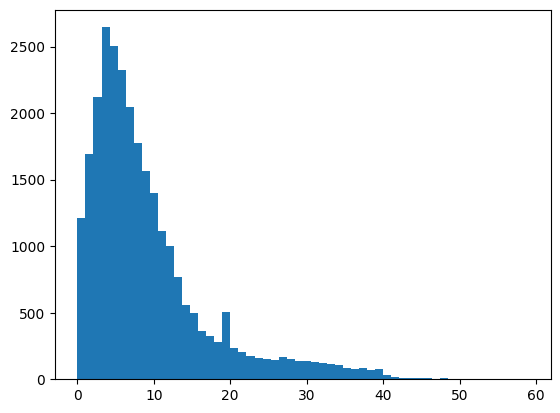

In [ ]:
plt.hist(l_w, bins = 56)

In [ ]:
dr_train_idx = [i for i, w in enumerate(tk_train_x) if len(w) < 1]
dr_test_idx = [i for i, w in enumerate(tk_test_x) if len(w) < 1]
dr_val_idx = [i for i, w in enumerate(tk_val_x) if len(w) < 1]

In [ ]:
dr_train_idx

In [ ]:
dr_e_train_d = np.delete(tk_train_x, dr_train_idx, axis = 0)
dr_e_test_d = np.delete(tk_test_x, dr_test_idx, axis = 0)
dr_e_val_d = np.delete(tk_val_x, dr_val_idx, axis = 0)

s_train_y = np.delete(train_y, dr_train_idx, axis = 0)
s_test_y = np.delete(test_y, dr_test_idx, axis = 0)
s_val_y = np.delete(val_y, dr_val_idx, axis = 0)

(array([2.652e+03, 2.121e+03, 2.645e+03, 2.502e+03, 2.324e+03, 2.047e+03,
        1.778e+03, 1.568e+03, 1.403e+03, 1.116e+03, 1.003e+03, 7.660e+02,
        5.580e+02, 4.970e+02, 3.630e+02, 3.280e+02, 2.810e+02, 2.730e+02,
        2.350e+02, 2.370e+02, 2.080e+02, 1.760e+02, 1.630e+02, 1.550e+02,
        1.430e+02, 1.640e+02, 1.560e+02, 2.740e+02, 1.280e+02, 1.210e+02,
        1.140e+02, 1.100e+02, 8.700e+01, 7.400e+01, 8.100e+01, 6.700e+01,
        4.300e+01, 3.500e+01, 3.200e+01, 1.900e+01, 1.200e+01, 6.000e+00,
        8.000e+00, 8.000e+00, 5.000e+00, 7.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.        ,  2.03571429,  3.07142857,  4.10714286,  5.14285714,
         6.17857143,  7.21428571,  8.25      ,  9.28571429, 10.32142857,
        11.35714286, 12.39285714, 13.42857143, 14.46428571, 15.5       ,
        16.53571429, 17.57142857, 18.60714286, 19.64285714, 20.67857143,
        21

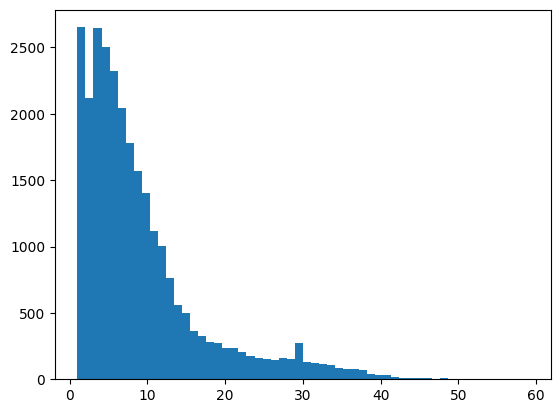

In [ ]:
l_w = np.array([len(w) for w in dr_e_train_d])
plt.hist(l_w, bins = 56)

In [ ]:
# 패딩 작업
w_l = 56
p_train_x = pad_sequences(dr_e_train_d, maxlen = w_l,)
p_test_x = pad_sequences(dr_e_test_d, maxlen = w_l)
p_val_x = pad_sequences(dr_e_val_d, maxlen = w_l)

In [ ]:
p_train_x.shape, s_train_y.shape

((27104, 59), (27104,))

In [ ]:
train_input = p_train_x
test_input = p_test_x
val_input = p_val_x

train_output = s_train_y
test_output = s_test_y
val_output = s_val_y

In [ ]:
save_f = {}
save_f['train_input'] = train_input
save_f['test_input'] = test_input
save_f['val_input'] = val_input
save_f['train_output'] = train_output
save_f['test_output'] = test_output
save_f['val_output'] = val_output
save_f['w_l'] = w_l
save_f['s_w'] = s_w
save_f['w_n'] = n
save_f['tk'] = tk

In [ ]:
import pickle
with open('pre_data.p', 'wb') as f:
    pickle.dump(save_f, f)

모델학습

In [ ]:
import pickle
with open("pre_data.p", 'rb') as f:
    all_d = pickle.load(f)
all_d.keys()

dict_keys(['train_input', 'test_input', 'val_input', 'train_output', 'test_output', 'val_output', 'w_l', 's_w', 'w_n', 'tk'])

In [ ]:
train_x = all_d['train_input']
test_x = all_d['test_input']
val_x = all_d['val_input']

In [ ]:
train_y = all_d['train_output']
test_y = all_d['test_output']
val_y = all_d['val_output']

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [ ]:
es = EarlyStopping(monitor = 'vla_loss', patience = 5, mode = 'min', restore_best_weights = True)
ck = ModelCheckpoint("b_m.h5", monitor = "val_acc", mode = "max")
tb = TensorBoard()

In [ ]:
단어수 = all_d['w_n']
단어수

7042

In [ ]:
길이 = all_d['w_l']
길이

56

In [ ]:
m = Sequential()
m.add(Embedding(단어수, 128))
m.add(LSTM(128, dropout = 0.5, return_sequences = True))
m.add(LSTM(128, dropout = 0.5))
m.add(Dense(1, activation = 'sigmoid'))
m.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 128)         901376    
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,164,673
Trainable params: 1,164,673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'acc')
m.fit(train_x, train_y, validation_data = (val_x, val_y), callbacks = [es, ck, tb], batch_size = 64, epochs = 15)

Epoch 1/15
424/424 [==============================] - ETA: 0s - loss: 0.4864 - acc: 0.7527

424/424 [==============================] - 187s 415ms/step - loss: 0.4864 - acc: 0.7527 - val_loss: 0.4033 - val_acc: 0.8131
Epoch 2/15
424/424 [==============================] - ETA: 0s - loss: 0.3489 - acc: 0.8465

424/424 [==============================] - 169s 399ms/step - loss: 0.3489 - acc: 0.8465 - val_loss: 0.4045 - val_acc: 0.8154
Epoch 3/15
424/424 [==============================] - ETA: 0s - loss: 0.3048 - acc: 0.8678

424/424 [==============================] - 182s 430ms/step - loss: 0.3048 - acc: 0.8678 - val_loss: 0.4266 - val_acc: 0.8073
Epoch 4/15
424/424 [==============================] - ETA: 0s - loss: 0.2722 - acc: 0.8852

424/424 [==============================] - 174s 410ms/step - loss: 0.2722 - acc: 0.8852 - val_loss: 0.4526 - val_acc: 0.8070
Epoch 5/15
424/424 [==============================] - ETA: 0s - loss: 0.2424 - acc: 0.8985

424/424 [==============================] - 197s 465ms/step - loss: 0.2424 - acc: 0.8985 - val_loss: 0.4785 - val_acc: 0.7985
Epoch 6/15
424/424 [==============================] - ETA: 0s - loss: 0.2166 - acc: 0.9098

424/424 [==============================] - 206s 487ms/step - loss: 0.2166 - acc: 0.9098 - val_loss: 0.5571 - val_acc: 0.8006
Epoch 7/15
424/424 [==============================] - ETA: 0s - loss: 0.1972 - acc: 0.9175

424/424 [==============================] - 201s 475ms/step - loss: 0.1972 - acc: 0.9175 - val_loss: 0.5695 - val_acc: 0.7941
Epoch 8/15
424/424 [==============================] - ETA: 0s - loss: 0.1785 - acc: 0.9271

424/424 [==============================] - 185s 435ms/step - loss: 0.1785 - acc: 0.9271 - val_loss: 0.6347 - val_acc: 0.7903
Epoch 9/15
424/424 [==============================] - ETA: 0s - loss: 0.1613 - acc: 0.9328

424/424 [==============================] - 191s 449ms/step - loss: 0.1613 - acc: 0.9328 - val_loss: 0.6478 - val_acc: 0.7851
Epoch 10/15
424/424 [==============================] - ETA: 0s - loss: 0.1470 - acc: 0.9396

424/424 [==============================] - 182s 429ms/step - loss: 0.1470 - acc: 0.9396 - val_loss: 0.6985 - val_acc: 0.7889
Epoch 11/15
424/424 [==============================] - ETA: 0s - loss: 0.1349 - acc: 0.9437

424/424 [==============================] - 170s 401ms/step - loss: 0.1349 - acc: 0.9437 - val_loss: 0.7077 - val_acc: 0.7873
Epoch 12/15
424/424 [==============================] - ETA: 0s - loss: 0.1197 - acc: 0.9504

424/424 [==============================] - 169s 398ms/step - loss: 0.1197 - acc: 0.9504 - val_loss: 0.7563 - val_acc: 0.7866
Epoch 13/15
424/424 [==============================] - ETA: 0s - loss: 0.1078 - acc: 0.9551

424/424 [==============================] - 168s 398ms/step - loss: 0.1078 - acc: 0.9551 - val_loss: 0.8697 - val_acc: 0.7830
Epoch 14/15
424/424 [==============================] - ETA: 0s - loss: 0.1031 - acc: 0.9582

424/424 [==============================] - 169s 400ms/step - loss: 0.1031 - acc: 0.9582 - val_loss: 0.8514 - val_acc: 0.7869
Epoch 15/15
424/424 [==============================] - ETA: 0s - loss: 0.0963 - acc: 0.9606

424/424 [==============================] - 180s 424ms/step - loss: 0.0963 - acc: 0.9606 - val_loss: 0.8642 - val_acc: 0.7843


In [ ]:
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

동작기 설계

In [ ]:
import pickle
with open("pre_data.p", 'rb') as f:
    all_d = pickle.load(f)
test_x = all_d['test_input']
test_y = all_d['test_output']
token = all_d ['tk']
w_l = all_d['w_l']

In [ ]:
from keras.models import load_model
lm = load_model("b_m.h5")

In [ ]:
lm.evaluate(test_x, test_y)[1]

453/453 [==============================] - 36s 76ms/step - loss: 0.8564 - acc: 0.7871


0.7870709300041199

In [ ]:
from konlpy.tag import Okt
import re
def 문장_예측기(문장, 파일이름):
    okt = Okt()
    문장 = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣]", '', 문장)
    문장 = okt.morphs(문장)
    s_w = all_d['s_w']
    문장 = [w for w in 문장 if w not in s_w]
    ec_w = token.texts_to_sequences([문장])
    p_new = pad_sequences(ec_w, maxlen = w_l)
    lm = load_model(파일이름)
    sc = float(lm.predict(p_new))
    if sc > 0.5:
        print(f'{sc * 100:.2f}%로 긍정')
    else:
        print(f'{(1 - sc) * 100:.2f}%로 부정')

문장_예측기('뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아','b_m.h5')

1/1 [==============================] - 3s 3s/step
99.90%로 부정


데이터 시각화

In [ ]:
import pickle
from keras.models import load_model
with open("pre_data.p", "rb") as f:
    all_d = pickle.load(f)

In [ ]:
train_x = all_d['train_input']
test_x = all_d['test_input']
val_x = all_d['val_input']
train_y = all_d['train_output']
test_y = all_d['test_output']
val_y = all_d['val_output']
tk = all_d['tk']
w_n = all_d['w_n']
w_l = all_d['w_l']

In [ ]:
lm = load_model('b_m.h5')

In [ ]:
lm.layers[0]

In [ ]:
dic_data = tk.word_index

In [ ]:
list(tk.word_index.keys())[:w_n]

In [ ]:
sorted(list(tk.word_counts.items()),key = lambda x:x[1], reverse = True)[0]

('영화', 8705)

In [ ]:
lm.layers[0].get_weights()[0].shape

(7042, 128)

In [ ]:
w = lm.layers[0].get_weights()[0]
vc = list(tk.word_index.keys())[:w_n]

In [ ]:
out_v = open("v_data.tsv", 'w', encoding = 'utf-8')
out_m = open("m_data.tsv", 'w', encoding = 'utf-8')
for i, v in enumerate(vc):
    vec = w[i]
    out_v.write('\t'.join([str(x) for x in vec]) + '\n')


array([[2., 2., 2.]])